# Other Classification Exercise - KNN

In [5]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [6]:
iris_data=pd.read_csv('iris-data-clean.csv')
iris_data

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
140,6.7,3.0,5.2,2.3,Virginica
141,6.3,2.5,5.0,1.9,Virginica
142,6.5,3.0,5.2,2.0,Virginica
143,6.2,3.4,5.4,2.3,Virginica


In [7]:
df = iris_data.replace(['Setosa','Virginica','Versicolor'],[0,1,2])
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


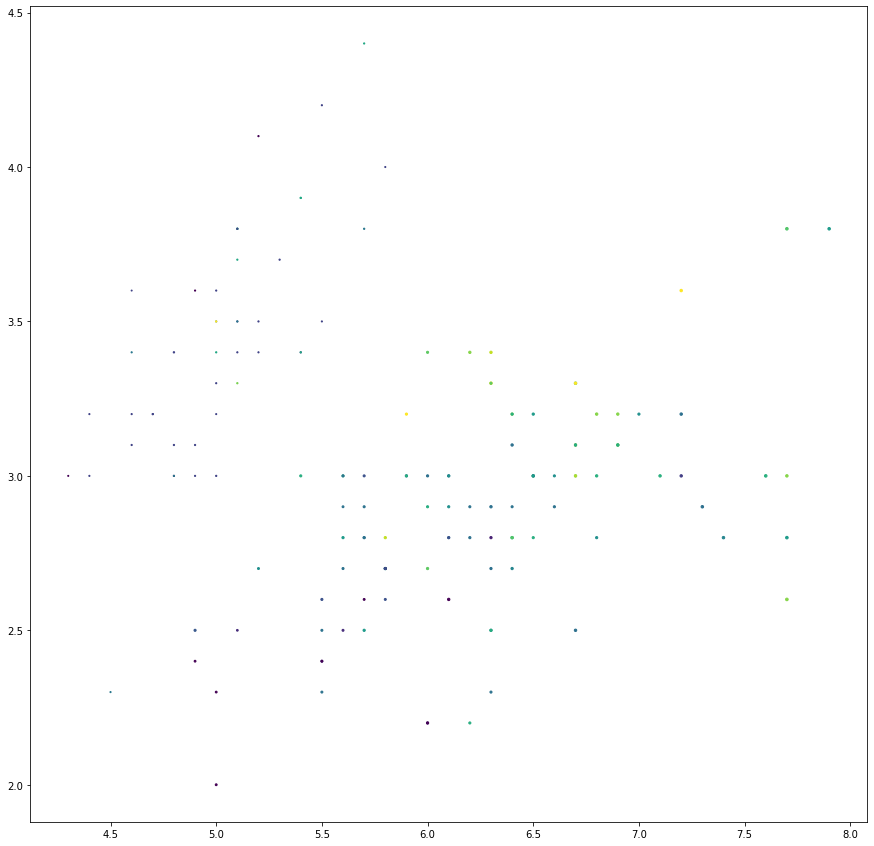

In [8]:
fig,ax=plt.subplots(figsize=(15,15))
df_zero = df.loc[df['class'] == 0]
df_one = df.loc[df['class'] == 1]
df_two = df.loc[df['class'] == 2]

ax.scatter(df_zero['sepal_length_cm'],df_zero['sepal_width_cm'],df_zero['petal_length_cm'],df_zero['petal_width_cm'])
ax.scatter(df_one['sepal_length_cm'],df_one['sepal_width_cm'],df_one['petal_length_cm'],df_one['petal_width_cm'])
ax.scatter(df_two['sepal_length_cm'], df_two['sepal_width_cm'],df_two['petal_length_cm'],df_two['petal_width_cm'])
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X=df.iloc[:,0:4]
y=df['class']

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train.head()

(108, 4)
(37, 4)
(108,)
(37,)


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
60,6.7,3.1,4.4,1.4
67,6.3,2.5,4.9,1.5
98,6.3,2.9,5.6,1.8
110,6.4,3.2,5.3,2.3
97,7.1,3.0,5.9,2.1


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [11]:
y_pre = knn.predict(X_test)
y_pre

array([2, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 1, 2, 2, 1,
       0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [12]:
print(y_test)
print(accuracy_score(y_test,y_pre))

69     2
140    1
27     0
19     0
42     0
117    1
126    1
108    1
84     2
18     0
12     0
55     2
128    1
78     2
73     2
36     0
112    1
133    1
100    1
101    1
94     2
136    1
11     0
66     2
31     0
45     2
51     2
76     2
111    1
9      0
4      0
26     0
120    1
125    1
16     0
10     0
118    1
Name: class, dtype: int64
0.9459459459459459


In [13]:
print(knn.predict([[5.5,6.4,5.3,2.1]]))

[1]


### Experimentation -- choosing two features

In [14]:
X2=df.iloc[:,0:2]
y2=df['class']
X2.head()

,sepal_length_cm,sepal_width_cm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [15]:
df_zero=df.loc[df['class'] == 0]
df_one=df.loc[df['class'] == 1]
df_two=df.loc[df['class'] == 2]

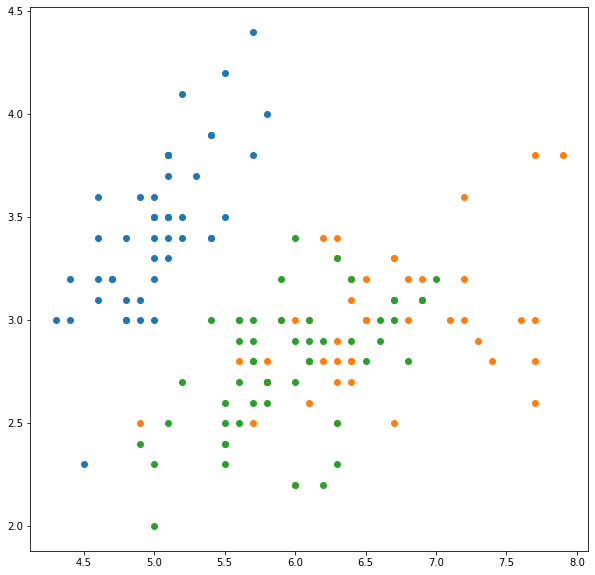

In [16]:
fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(df_zero.iloc[:,0:1],df_zero.iloc[:,1:2])
ax.scatter(df_one.iloc[:,0:1],df_one.iloc[:,1:2])
ax.scatter(df_two.iloc[:,0:1],df_two.iloc[:,1:2])
plt.show()

In [17]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2, y2, random_state=42)
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(108, 2)
(37, 2)
(108,)
(37,)


In [18]:
knn2 = KNeighborsClassifier(n_neighbors = 3)
knn2.fit(X2_train,y2_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
y2_pre = knn2.predict(X2_test)
y2_pre

array([1, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1,
       0, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [20]:
print(accuracy_score(y2_test,y2_pre))

0.7567567567567568


In [22]:
for k in np.arange(1,41,2):
    knn3 = KNeighborsClassifier(n_neighbors = k)
    knn3.fit(X2_train,y2_train)
    ac=accuracy_score(y2_test,knn3.predict(X2_test))
    print(k)
    print(ac)

1
0.7837837837837838
3
0.7567567567567568
5
0.7837837837837838
7
0.7837837837837838
9
0.7567567567567568
11
0.7837837837837838
13
0.7837837837837838
15
0.7837837837837838
17
0.8108108108108109
19
0.8108108108108109
21
0.8108108108108109
23
0.8108108108108109
25
0.8108108108108109
27
0.8378378378378378
29
0.8378378378378378
31
0.8108108108108109
33
0.8108108108108109
35
0.8378378378378378
37
0.8378378378378378
39
0.8378378378378378
